# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup Object
html = browser.html
soup = BeautifulSoup(html, 'html.parser')

In [5]:
# Extract all rows of data
table = soup.find('table', class_='table')
len(table)

2

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [6]:
# Create an empty dictionary
mars_temp_table = []

# Find all rows in the table
rows = table.find_all('tr')

# Loop through the scraped data to create a dictionary of rows
for row in rows:
    cells = row.find_all(['th', 'td'])
    cells_value = [cell.get_text() for cell in cells]
       
    # Add the heading and data to the dictionary
    mars_temp_table.append(cells_value)

# Display the scraped table dictionary
mars_temp_table


[['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure'],
 ['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0'],
 ['13', '2012-08-17', '11', '156', '6', '-76.0', '740.0'],
 ['24', '2012-08-18', '12', '156', '6', '-76.0', '741.0'],
 ['35', '2012-08-19', '13', '157', '6', '-74.0', '732.0'],
 ['46', '2012-08-20', '14', '157', '6', '-74.0', '740.0'],
 ['57', '2012-08-21', '15', '158', '6', '-78.0', '740.0'],
 ['68', '2012-08-22', '16', '158', '6', '-77.0', '740.0'],
 ['79', '2012-08-23', '17', '159', '6', '-76.0', '742.0'],
 ['112', '2012-08-27', '21', '161', '6', '-74.0', '741.0'],
 ['114', '2012-08-28', '22', '162', '6', '-74.0', '742.0'],
 ['123', '2012-08-29', '23', '162', '6', '-75.0', '741.0'],
 ['134', '2012-08-30', '24', '163', '6', '-75.0', '742.0'],
 ['145', '2012-08-31', '25', '163', '6', '-75.0', '743.0'],
 ['156', '2012-09-01', '26', '164', '6', '-76.0', '745.0'],
 ['163', '2012-09-02', '27', '164', '6', '-75.0', '743.0'],
 ['170', '2012-09-03', '28', '165'

In [7]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
mars_temp_df = pd.DataFrame(mars_temp_table[1:], columns=mars_temp_table[0])

In [8]:
# Confirm DataFrame was created successfully
mars_temp_df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [9]:
# Examine data type of each column
mars_temp_df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [10]:
# Change data types for data analysis
mars_temp_df['terrestrial_date'] = pd.to_datetime(mars_temp_df['terrestrial_date'])
mars_temp_df['sol'] = mars_temp_df['sol'].astype('int32')
mars_temp_df['ls'] = mars_temp_df['ls'].astype('int32')
mars_temp_df['month'] = mars_temp_df['month'].astype('int32')
mars_temp_df['min_temp'] = mars_temp_df['min_temp'].astype('float64')
mars_temp_df['pressure'] = mars_temp_df['pressure'].astype('float64')


In [11]:
# Confirm type changes were successful by examining data types again
mars_temp_df.dtypes

id                          object
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                        int32
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [12]:
# 1. How many months are there on Mars?
count_mont = mars_temp_df['month'].nunique()
count_mont

12

In [13]:
# 2. How many sols (Martian days) worth of data are there?
count_sols = mars_temp_df['sol'].nunique()
count_sols

1867

In [14]:
# 3. What is the average minimum temperature by month?
avg_min_temp_month = mars_temp_df.groupby('month')['min_temp'].mean()
avg_min_temp_month

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

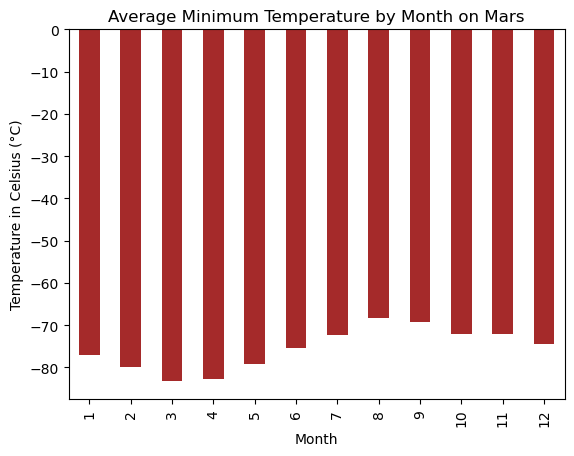

In [15]:
# Plot the average minimum temperature by month
avg_min_temp_month.plot(kind='bar', color='brown')

# Add labels and title
plt.ylabel('Temperature in Celsius (°C)')
plt.xlabel('Month')
plt.title('Average Minimum Temperature by Month on Mars')

# Display the plot
plt.show()

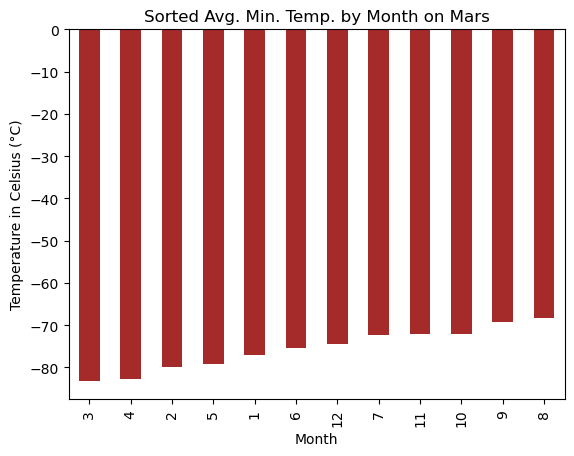

In [16]:
# Identify the coldest and hottest months in Curiosity's location by sorting the previous graph

# Sort the temperature to indentify the coldest and hottest months
avg_min_temp_month_sorted = avg_min_temp_month.sort_values()

# Plot the temperature to indentify the coldest and hottest months
avg_min_temp_month_sorted.plot(kind='bar', xlabel='Month', ylabel='Temperature in Celsius (°C)', title='Sorted Avg. Min. Temp. by Month on Mars', color='brown')
# Show the plot
plt.show()

In [17]:
# 4. What is the average pressure by month?
avg_min_pressure_month = mars_temp_df.groupby('month')['pressure'].mean()
avg_min_pressure_month

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

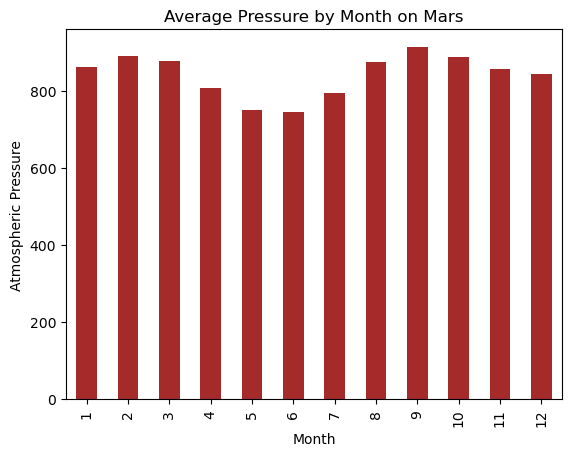

In [18]:
# Plot the average pressure by month
avg_min_pressure_month.plot(kind="bar", xlabel='Month', ylabel='Atmospheric Pressure', title='Average Pressure by Month on Mars', color='brown')
# Show the plot
plt.show()

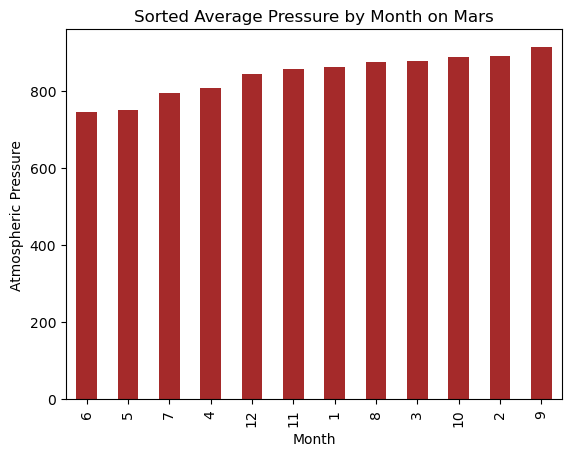

In [19]:
# Identify the lowest and highest pressure months in Curiosity's location by sorting the previous graph
avg_min_pressure_month_sorted = avg_min_pressure_month.sort_values()
# Plot the lowest and highest pressure months on Mars
avg_min_pressure_month_sorted.plot(kind='bar', xlabel='Month', ylabel='Atmospheric Pressure', title='Sorted Average Pressure by Month on Mars', color='brown')
# Show the plot
plt.show()


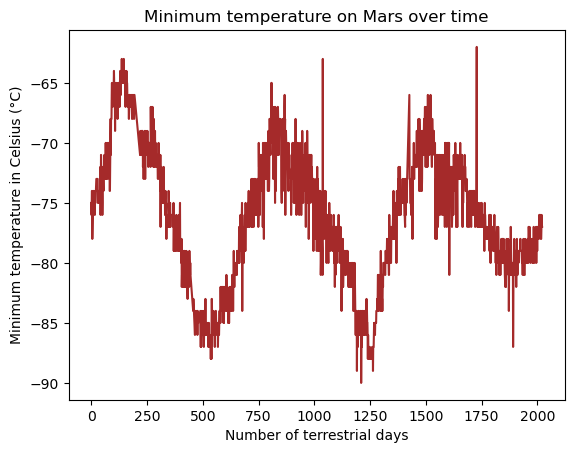

In [20]:
# 5. How many terrestrial (Earth) days are there in a Martian year?
# Visually estimate the result by plotting the daily minimum temperature of each observation in the data set.
mars_temp_df['days_since_first'] = (mars_temp_df['terrestrial_date'] - mars_temp_df['terrestrial_date'].min()).dt.days

# Ploting daily minimm temperature
plt.plot(mars_temp_df['days_since_first'], mars_temp_df['min_temp'], color='brown')

# Adding title and labels
plt.xlabel('Number of terrestrial days')
plt.ylabel('Minimum temperature in Celsius (°C)')
plt.title('Minimum temperature on Mars over time')

plt.show()

#### Minimum Temperature

Mars has a minimum average temperature way lower than Earth's, where it hardly ever is above -70 °C.
The coldest month on Mars is March, with an average minimum temperature of -83.31°C. 
The hottest month on Mars is August, with an average minimum temperature of -68.38°C. Between "summer" and "winter," the average minimum temperature varied from 14.93°C.

#### Atmospheric Pressure

September is the month wiht the highest average pressure on Mars, at 931.31.
July is the month with the lowest average pressure on Mart, at 745.05.
Similar to Earth, Mars likely experiences seasonal atmospheric varitation. The pressuer incereases and decreases cyclically, which may correspond to the Martin season (spring, summer, fall and winter).
The atmospheric pressure seems to vary according to temperature, presenting low pressure at lower temperatures and high pressure at higher temperatures.

#### Year Length

Mars seems to have the same 4 seasons as we have on Earth, and well defined.
Looks like 1 year on Mars is 686 on Earth.
It is also interesting to see that some days in the fall had way higher temperatures than the average, and those days could get even warmer than during the summer, considering the minimum temperature over time.  

 

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [21]:
# Write the data to a CSV
mars_temp_df.to_csv('Mars_Temperature_Data.csv', index=False)

In [22]:
browser.quit()